In [1]:
#The Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np


boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df=pd.read_csv(boston_url)

In [3]:
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
###Explaining The Variables

#CRIM - per capita crime rate by town

#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#INDUS - proportion of non-retail business acres per town.

#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#NOX - nitric oxides concentration (parts per 10 million)

#RM - average number of rooms per dwelling

#AGE - proportion of owner-occupied units built prior to 1940

#DIS - weighted distances to five Boston employment centres

#RAD - index of accessibility to radial highways

#TAX - full-value property-tax rate per $10,000

#PTRATIO - pupil-teacher ratio by town

#LSTAT - % lower status of the population

#MEDV - Median value of owner-occupied homes in $1000's


Text(0.5, 1.0, 'Median value of owner-occupied homes')

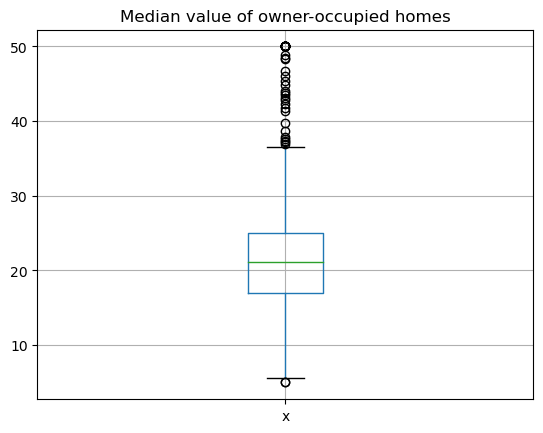

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot

pd.DataFrame.boxplot(boston_df.MEDV)
plt.title('Median value of owner-occupied homes')

#About the boxplot:
#This box plot shows the median value of homes occupied by their owner in 1000's of dollars.

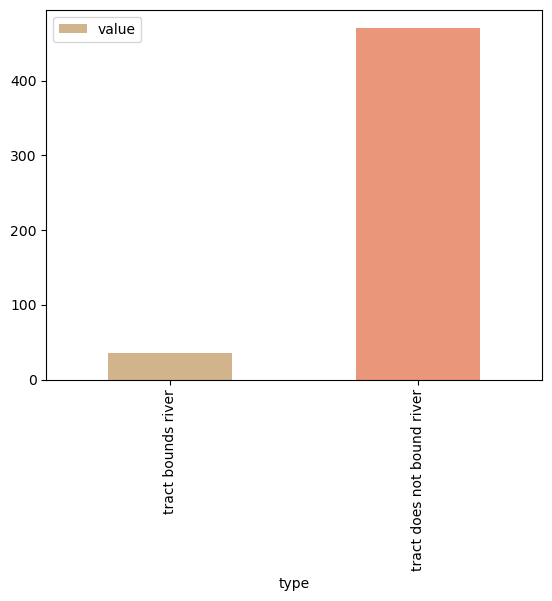

In [6]:
#Provide a  bar plot for the Charles river variable

tract_bounds_river=0
tract_not_bounds_river=0
for i in boston_df.CHAS:
    if i == 1:
        tract_bounds_river=tract_bounds_river+1
    else:
        tract_not_bounds_river=tract_not_bounds_river+1
df={'type': ['tract bounds river', 'tract does not bound river'],'value': [tract_bounds_river, tract_not_bounds_river]}
df=pd.DataFrame(df)
df.plot.bar(x='type',y='value', color=['tan', 'darksalmon'])
plt.show()

#About the bar plot:
#This bar plot shows us the distribuition of the tract dependent on if they are bounding the river or not. In this case there is a larger amount of tracts not bounding the river.


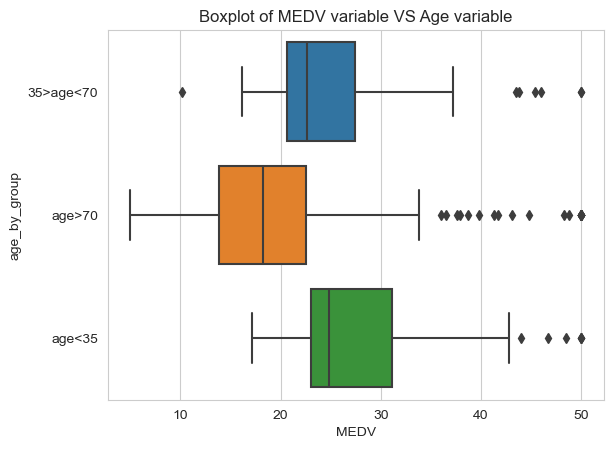

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE']<=35), 'age_by_group']='age<35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_by_group']='35>age<70'
boston_df.loc[(boston_df['AGE']>=70), 'age_by_group']='age>70'
sns.set_style("whitegrid")
sns.boxplot(x='MEDV', y='age_by_group', data=boston_df)
plt.title('Boxplot of MEDV variable VS Age variable')
plt.show()


#About this boxplot:
#This boxplot allows us to understand that the median value of owner occupied homes is higher when the age is lower.

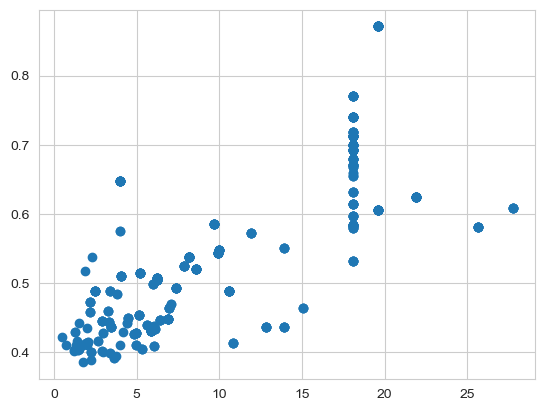

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.scatter(boston_df.INDUS, boston_df.NOX)
plt.show()

#About this scatter plot:
#Analysing the graph we can se that there is a semi linear padron which could mean that there is correlation (positive in this case) but to be sure of that we would need to test it. We can alson conclude that there is a bigger correlation between lower values of NOX and INDUS variable due to the data being all clumped in the left bottom corner

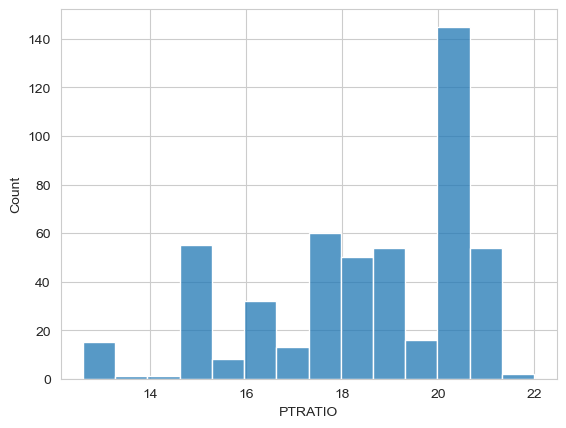

In [9]:
#Create a histogram for the pupil to teacher ratio variable

sns.histplot(x='PTRATIO', data= boston_df)
plt.show()
#About this histogram:
#This histogram makes the fact mos PTRATIO valus reside close to 20 obvious.

In [10]:
###USING TESTS TO ANSWER THE QUESTION PROVIDED

In [11]:
#1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Hypothesis:
#Null Hypothesis-There is no difference in median value of houses bounded and not bounded by the Charles River
#Alternative Hypothesis-There is a difference in median value of houses bounded and not bounded by the Charles River

stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
               boston_df[boston_df['CHAS']==0]['MEDV'])

#This p-value is significant therefor we reject the null hypothesis, in this case, that means that there is a statistical diference in the median value of houses bounded by the Charles river

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [12]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Hypothesis
#Null Hypotesis-There is no difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940 (AGE)
#Alternative Hypothesis-There is a difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940 (AGE)

model = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(model)
print(table)

#As we can see the p-value is less than 0.05 that means we reject the null hypothesis in this case that means there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [13]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

np.corrcoef(boston_df['NOX'], boston_df['INDUS'])

#Given the value of 0.7 we can conclude that there is a positive correlation between the two variables. If we plot them we can also see this correlation.

array([[1.        , 0.76365145],
       [0.76365145, 1.        ]])

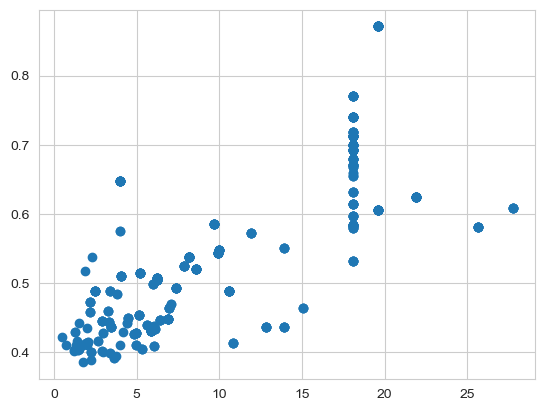

In [14]:
plt.scatter(boston_df.INDUS, boston_df.NOX)
plt.show()

#this correlation and scatter plot had already been showed in the question "Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?"

In [15]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predict = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        23:01:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#The coeficient 'DIS' show us that there is a 1.0916 increase in the median value of homes for an additional weighted distance to the 5 empolyment centers in Boston